STOCK PRICE PREDICTION USING LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from datetime import datetime
import math

IMPORTING TCS(TATA COSULTANCY SERVICES) DAILY HISTORICAL DATA FROM 12 AUG 2002 TO 12 MAY 2023 

In [2]:
df=pd.read_csv("D:\TCS.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.484993,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.099350,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.162073,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.162073,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.099287,811856.0
...,...,...,...,...,...,...,...
5158,2023-05-08,3245.000000,3254.850098,3231.300049,3250.600098,3250.600098,928235.0
5159,2023-05-09,3252.600098,3298.000000,3246.000000,3283.250000,3283.250000,1107375.0
5160,2023-05-10,3290.000000,3306.500000,3266.050049,3286.800049,3286.800049,1559987.0
5161,2023-05-11,3309.000000,3309.699951,3272.000000,3282.149902,3282.149902,1719623.0


PREPROCESSING DATA

In [3]:
df['Open']=df['Open'].shift(1)
df['High']=df['High'].shift(1)
df['Low']=df['Low'].shift(1)
df['Volume']=df['Volume'].shift(1)
df=df.drop('Adj Close',axis=1)
df=df.drop(0)
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df[('Date')].values.astype("float64")
"""zs = np.abs(stats.zscore(df))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
df = df[(zs<1.5).all(axis=1)]"""

#find how many rows are left in the dataframe 
df.set_index('Date',inplace=True)


In [4]:
df2=df
df_monthly = df2.resample('M').mean()
df_weekly = df2.resample('W').mean()

In [5]:
df.reset_index(inplace=True)
df_monthly.reset_index(inplace=True)
df_weekly.reset_index(inplace=True)

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2002-08-13,38.724998,40.000000,38.724998,39.162498,212976.0
1,2002-08-14,39.750000,40.387501,38.875000,36.462502,153576.0
2,2002-08-15,39.250000,39.250000,35.724998,36.462502,822776.0
3,2002-08-16,36.462502,36.462502,36.462502,36.375000,0.0
4,2002-08-19,36.275002,38.000000,35.750000,35.474998,811856.0


In [7]:
df_monthly.head()

,Date,Open,High,Low,Close,Volume
0,2002-08-31,39.174107,40.348214,38.240178,39.316072,2.124896e+06
1,2002-09-30,40.803571,41.811309,40.037500,40.422619,7.873200e+05
2,2002-10-31,38.067935,38.577174,37.120653,37.527174,2.271447e+05
3,2002-11-30,38.711310,39.656548,38.297024,39.098215,3.476130e+05
4,2002-12-31,50.890341,52.642613,49.802273,51.927841,1.829411e+06


In [8]:
df_weekly.head()

,Date,Open,High,Low,Close,Volume
0,2002-08-18,38.546875,39.025001,37.446874,37.115626,297332.0
1,2002-08-25,37.332500,38.835000,36.442500,38.477500,2906980.8
2,2002-09-01,41.517499,42.920000,40.672500,41.915000,2804862.4
3,2002-09-08,43.460000,44.929999,42.237500,42.960000,1929990.4
4,2002-09-15,41.467499,42.560000,40.902500,41.404999,641244.8


In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df_monthly.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df_weekly.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [12]:
df.reset_index(inplace=True)
df_monthly.reset_index(inplace=True)
df_weekly.reset_index(inplace=True)
df=df.drop('index',axis=1)
df_monthly=df_monthly.drop('index',axis=1)
df_weekly=df_weekly.drop('index',axis=1)

In [13]:
df['Date'] = df[('Date')].values.astype("float64")
df_weekly['Date'] = df_weekly[('Date')].values.astype("float64")
df_monthly['Date'] = df_monthly[('Date')].values.astype("float64")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5144 non-null   float64
 1   Open    5144 non-null   float64
 2   High    5144 non-null   float64
 3   Low     5144 non-null   float64
 4   Close   5144 non-null   float64
 5   Volume  5144 non-null   float64
dtypes: float64(6)
memory usage: 241.3 KB


In [15]:
df_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1083 non-null   float64
 1   Open    1083 non-null   float64
 2   High    1083 non-null   float64
 3   Low     1083 non-null   float64
 4   Close   1083 non-null   float64
 5   Volume  1083 non-null   float64
dtypes: float64(6)
memory usage: 50.9 KB


In [16]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    250 non-null    float64
 1   Open    250 non-null    float64
 2   High    250 non-null    float64
 3   Low     250 non-null    float64
 4   Close   250 non-null    float64
 5   Volume  250 non-null    float64
dtypes: float64(6)
memory usage: 11.8 KB


In [17]:
df_monthly.describe()

,Date,Open,High,Low,Close,Volume
count,2.500000e+02,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,1.358134e+18,1098.774265,1110.308685,1086.232650,1098.768271,3.258640e+06
std,1.901682e+17,1054.684934,1063.948627,1044.311125,1054.419576,1.959313e+06
min,1.030752e+18,38.067935,38.387501,37.120653,37.527174,0.000000e+00
25%,1.194437e+18,231.081919,236.482042,225.413666,229.712843,2.143443e+06
50%,1.358251e+18,665.809599,672.353838,657.456226,664.568899,2.896930e+06
75%,1.521785e+18,1498.782893,1517.610859,1482.196056,1493.560862,3.995717e+06
max,1.685491e+18,3855.895007,3888.577478,3805.385010,3847.367480,1.210765e+07


In [18]:
df_weekly.describe()

,Date,Open,High,Low,Close,Volume
count,1.083000e+03,1083.000000,1083.000000,1083.000000,1083.000000,1.083000e+03
mean,1.356826e+18,1094.819568,1106.377778,1082.280207,1094.823668,3.254179e+06
std,1.891690e+17,1049.321963,1058.581784,1038.950609,1048.997741,2.372810e+06
min,1.029629e+18,36.375000,36.995001,36.085000,36.620000,0.000000e+00
25%,1.193227e+18,233.585416,239.778751,227.999167,233.184503,1.935609e+06
50%,1.356826e+18,666.175000,675.379993,660.125000,663.779993,2.750914e+06
75%,1.520424e+18,1480.490625,1506.765015,1472.472498,1501.902503,4.031795e+06
max,1.684022e+18,3965.300000,3998.739990,3904.770020,3916.889990,2.351955e+07


In [19]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,5.144000e+03,5144.000000,5144.000000,5144.000000,5144.000000,5.144000e+03
mean,1.354707e+18,1089.539949,1101.035495,1077.105138,1089.590880,3.242543e+06
std,1.900824e+17,1050.661757,1059.946414,1040.301150,1050.430313,3.179420e+06
min,1.029197e+18,35.724998,36.450001,35.137501,35.474998,0.000000e+00
25%,1.189015e+18,229.250000,235.000000,222.703125,228.746872,1.663311e+06
50%,1.354622e+18,657.524994,662.250000,651.750000,658.075012,2.549872e+06
75%,1.519409e+18,1473.125000,1491.381256,1461.125000,1477.887512,4.020328e+06
max,1.683850e+18,4033.949951,4043.000000,3980.000000,4019.149902,8.806715e+07


In [20]:
x_daily=df[['Date','Open','High','Low','Volume']]
y_daily=df['Close']
x_weekly=df_weekly[['Date','Open','High','Low','Volume']]
y_weekly=df_weekly['Close']
x_monthly=df_monthly[['Date','Open','High','Low','Volume']]
y_monthly=df_monthly['Close']

In [21]:
print(x_daily.shape,y_daily.shape)
print(x_monthly.shape,y_monthly.shape)
print(x_weekly.shape,y_weekly.shape)

(5144, 5) (5144,)
(250, 5) (250,)
(1083, 5) (1083,)


In [22]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_daily,y_daily,random_state=1)
x2_train,x2_test,y2_train,y2_test=train_test_split(x_weekly,y_weekly,random_state=1)
x3_train,x3_test,y3_train,y3_test=train_test_split(x_monthly,y_monthly,random_state=1)

In [23]:
print(x1_train.shape,x1_test.shape)
print(y1_train.shape,y1_test.shape)
print(x2_train.shape,x2_test.shape)
print(y2_train.shape,y2_test.shape)
print(x3_train.shape,x3_test.shape)
print(y3_train.shape,y3_test.shape)

(3858, 5) (1286, 5)
(3858,) (1286,)
(812, 5) (271, 5)
(812,) (271,)
(187, 5) (63, 5)
(187,) (63,)


In [24]:
daily_model=LinearRegression()
weekly_model=LinearRegression()
monthly_model=LinearRegression()
daily_model.fit(x1_train,y1_train)
weekly_model.fit(x2_train,y2_train)
monthly_model.fit(x3_train,y3_train)


LinearRegression()

In [25]:
print("For daily price prediction model : ")
print(daily_model.coef_)
print(daily_model.intercept_)

For daily price prediction model : 
[1.02913144e-17 3.33009769e-01 3.35263824e-01 3.29999559e-01
 3.18971743e-08]
-11.731149412344621


In [26]:
print("For weekly price prediction model : ")
print(weekly_model.coef_)
print(weekly_model.intercept_)

For weekly price prediction model : 
[ 3.09144251e-18  3.33466090e-01  3.35822655e-01  3.30638863e-01
 -2.08289587e-08]
-3.551346756829844


In [27]:
print("For monthly price prediction model : ")
print(monthly_model.coef_)
print(monthly_model.intercept_)

For monthly price prediction model : 
[4.68716214e-19 3.33616942e-01 3.36007527e-01 3.30691078e-01
 4.24619367e-08]
-0.8010427380154397


<Axes: >

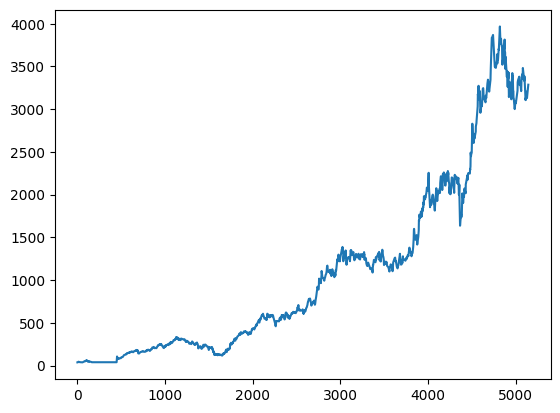

In [28]:
x1_test=x1_test.sort_index()
y1_test=y1_test.sort_index()
x1_train=x1_train.sort_index()
y1_train=y1_train.sort_index()
y1_test.plot(kind='line')

<Axes: >

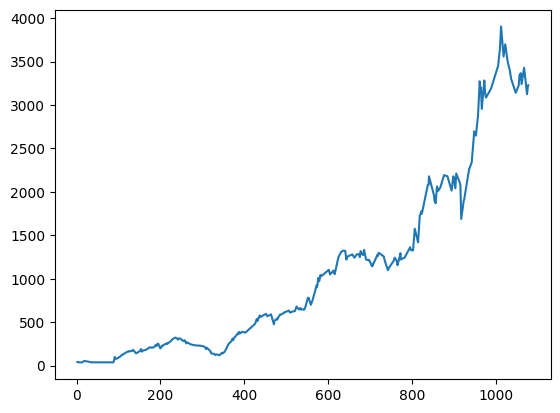

In [29]:
x2_test=x2_test.sort_index()
y2_test=y2_test.sort_index()
x2_train=x2_train.sort_index()
y2_train=y2_train.sort_index()
y2_test.plot(kind='line')

<Axes: >

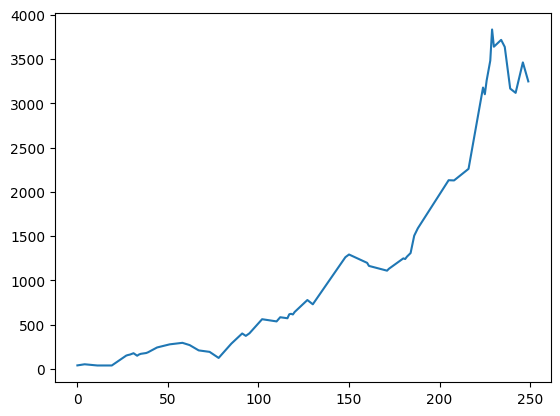

In [30]:
x3_test=x3_test.sort_index()
y3_test=y3_test.sort_index()
x3_train=x3_train.sort_index()
y3_train=y3_train.sort_index()
y3_test.plot(kind='line')

In [31]:
z_daily=daily_model.predict(x1_test)
print(x1_test.dtypes)
zz_daily=daily_model.predict(x1_train)
#z = np.array(z).reshape(-1, 1)
dftest_daily=pd.DataFrame({'actual price':y1_test,'predicted price':z_daily})
dftrain_daily=pd.DataFrame({'actual price':y1_train,'predicted price':zz_daily})
dftest_daily

Date      float64
Open      float64
High      float64
Low       float64
Volume    float64
dtype: object


,actual price,predicted price
1,36.462502,38.472765
4,35.474998,35.509309
5,36.462502,34.977723
11,41.137501,41.427633
12,41.137501,39.815197
...,...,...
5130,3174.800049,3125.492027
5132,3198.149902,3174.185817
5134,3219.250000,3185.188272
5140,3283.250000,3243.802598


In [32]:
z_weekly=weekly_model.predict(x2_test)
print(x2_test.dtypes)
zz_weekly=weekly_model.predict(x2_train)
#z = np.array(z).reshape(-1, 1)
dftest_weekly=pd.DataFrame({'actual price':y2_test,'predicted price':z_weekly})
dftrain_weekly=pd.DataFrame({'actual price':y2_train,'predicted price':zz_weekly})
dftest_weekly

Date      float64
Open      float64
High      float64
Low       float64
Volume    float64
dtype: object


,actual price,predicted price
2,41.915000,41.283104
3,42.960000,43.143408
5,40.097500,40.429898
6,37.897500,37.717171
8,37.747500,37.528535
...,...,...
1062,3240.520020,3246.558036
1068,3428.679980,3416.211289
1075,3125.070020,3140.821766
1077,3220.166667,3203.082774


In [33]:
z_monthly=monthly_model.predict(x3_test)
print(x3_test.dtypes)
zz_monthly=monthly_model.predict(x3_train)
#z = np.array(z).reshape(-1, 1)
dftest_monthly=pd.DataFrame({'actual price':y3_test,'predicted price':z_monthly})
dftrain_monthly=pd.DataFrame({'actual price':y3_train,'predicted price':zz_monthly})
dftest_monthly

Date      float64
Open      float64
High      float64
Low       float64
Volume    float64
dtype: object


,actual price,predicted price
0,39.316072,39.044450
4,51.927841,50.900070
11,38.387501,38.095228
16,38.387501,38.101424
18,38.387501,38.103853
...,...,...
236,3637.007890,3650.239002
239,3166.469064,3168.779819
242,3118.149979,3105.197951
246,3462.160022,3470.908285


Calculating r2 score

In [34]:

daily_model.score(x1_test,y1_test)

0.9993643502426681

In [35]:
daily_model.score(x1_train,y1_train)

0.999372370958105

In [36]:
weekly_model.score(x2_test,y2_test)

0.9997940437451832

In [37]:
weekly_model.score(x2_train,y2_train)

0.9997721184290101

In [38]:
monthly_model.score(x3_test,y3_test)

0.9999457255624215

In [39]:
monthly_model.score(x3_train,y3_train)

0.9999614540567635

Calculating Model Error For Testing Data

In [40]:
print("Mean absolute error for daily data: ",metrics.mean_absolute_error(z_daily,y1_test))
print("Mean squared root error for daily data: ",math.sqrt(metrics.mean_squared_error(z_daily,y1_test)))
print("Mean squared error for daily data: ",(metrics.mean_squared_error(z_daily,y1_test)))

Mean absolute error for daily data:  15.005971196636459
Mean squared root error for daily data:  26.308146785870907
Mean squared error for daily data:  692.1185873069297


In [41]:
print("Mean absolute error for weekly data: ",metrics.mean_absolute_error(z_weekly,y2_test))
print("Mean squared root error for weekly data: ",math.sqrt(metrics.mean_squared_error(z_weekly,y2_test)))
print("Mean squared error for weekly data: ",(metrics.mean_squared_error(z_weekly,y2_test)))

Mean absolute error for weekly data:  8.446588078312026
Mean squared root error for weekly data:  14.490115971028402
Mean squared error for weekly data:  209.96346085385235


In [42]:
print("Mean absolute error for monthly data: ",metrics.mean_absolute_error(z_monthly,y3_test))
print("Mean squared root error for monthly data: ",math.sqrt(metrics.mean_squared_error(z_monthly,y3_test)))
print("Mean squared error for monthly data: ",(metrics.mean_squared_error(z_monthly,y3_test)))

Mean absolute error for monthly data:  4.913686077750926
Mean squared root error for monthly data:  8.928672803041422
Mean squared error for monthly data:  79.72119802377156


Visualizing results for training and testing data

<Axes: >

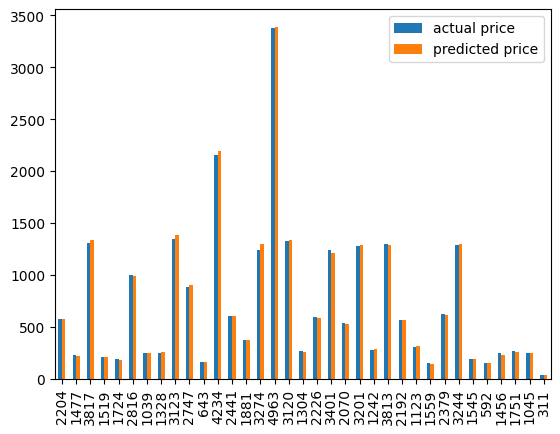

In [43]:
dftest_daily.sample(35).plot(kind='bar')

<Axes: >

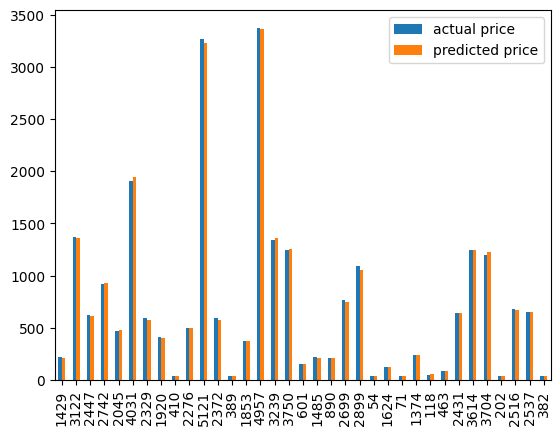

In [44]:
dftrain_daily.sample(35).plot(kind='bar')

<Axes: >

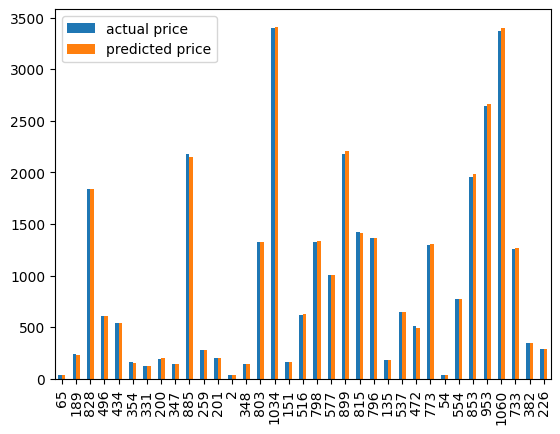

In [45]:
dftest_weekly.sample(35).plot(kind='bar')

<Axes: >

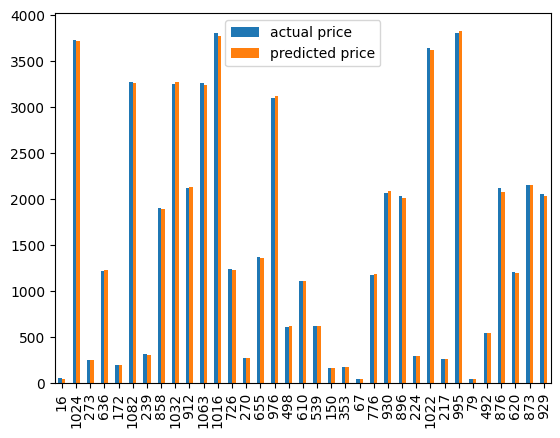

In [46]:
dftrain_weekly.sample(35).plot(kind='bar')

<Axes: >

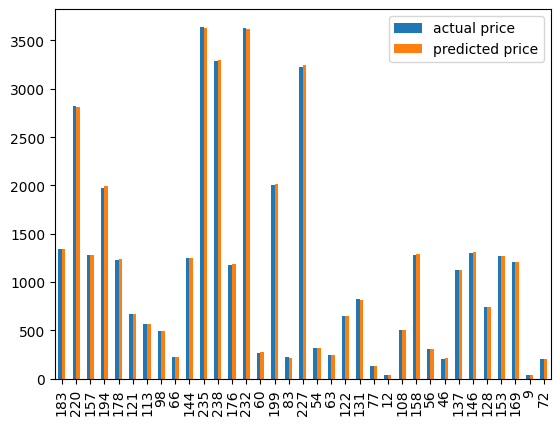

In [47]:
dftrain_monthly.sample(35).plot(kind='bar')

<Axes: >

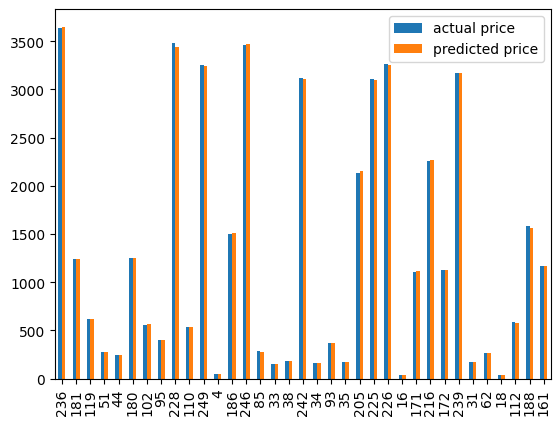

In [48]:
dftest_monthly.sample(35).plot(kind='bar')

<Axes: >

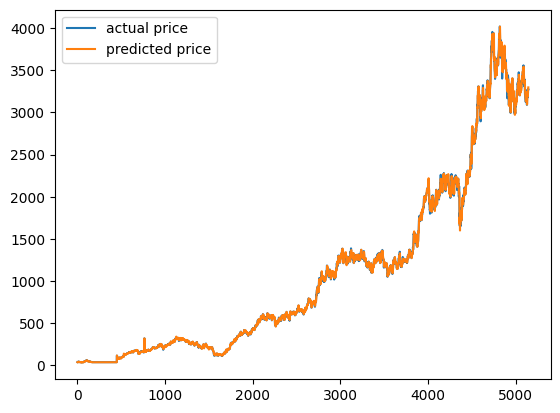

In [49]:
#plotting first 35 values of predicted and actual training set
dftrain_daily.plot(kind='line')

<Axes: >

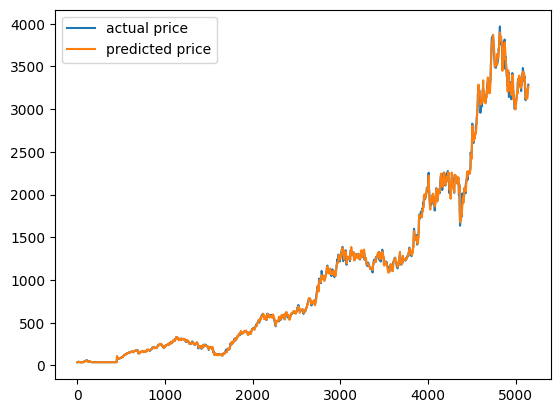

In [50]:
#plotting first 35 values of predicted and actual test set
dftest_daily.plot(kind='line')

<Axes: >

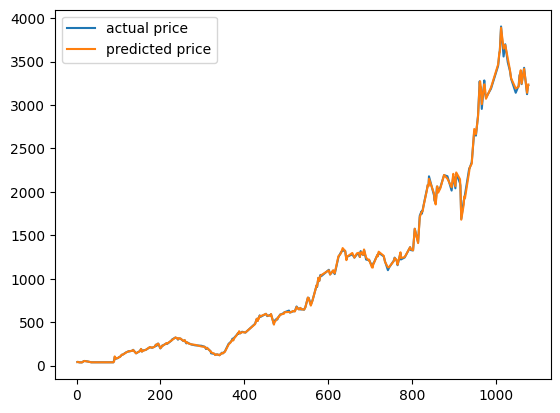

In [51]:
dftest_weekly.plot(kind='line')

<Axes: >

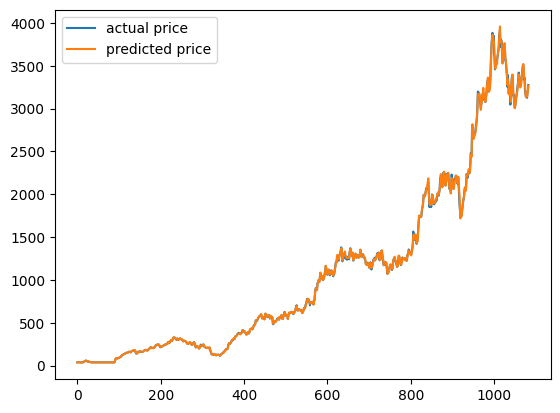

In [52]:
dftrain_weekly.plot(kind='line')

<Axes: >

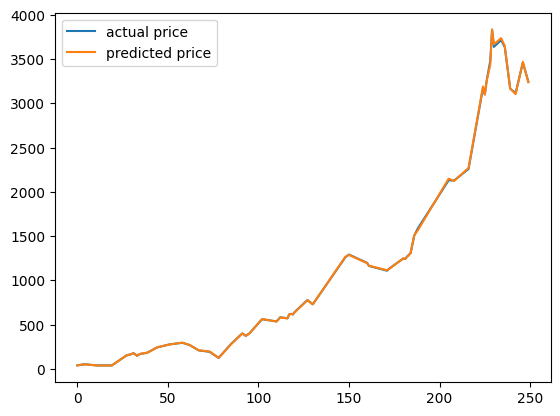

In [53]:
dftest_monthly.plot(kind='line')

<Axes: >

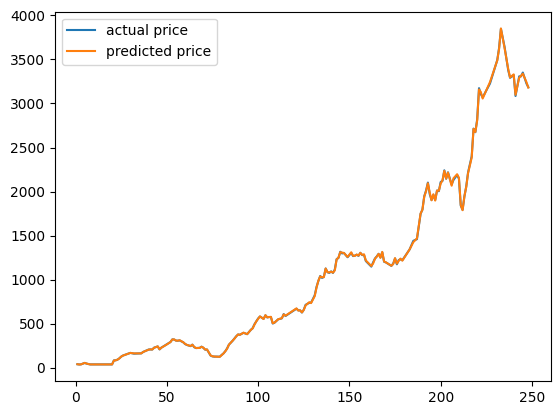

In [54]:
dftrain_monthly.plot(kind='line')

Test on Real life Data for 15th may 2023

In [55]:
data = [["2023-05-15",3279.15,3290.00,3260.00,1027479.00]]
columns=['Date','Open','High','Low','Volume'] 
# Creating the pandas DataFrame
df_unseen = pd.DataFrame(data, columns=['Date','Open','High','Low','Volume'])
df_unseen['Date'] = pd.to_datetime(df_unseen['Date'])
df_unseen['Date'] = df_unseen[('Date')].values.astype("float64")
# print dataframe.
df_unseen.dtypes
pp=daily_model.predict(df_unseen)
pp=pp[0]
ap=3255.05
er=(pp-ap)/ap
print("predicted: ",pp)
print("actual price: ", ap)
print("error:",er)
print("accuracy:",1-er)
print("error percentage:",er*100)

predicted:  3276.438843576825
actual price:  3255.05
error: 0.006570972358896149
accuracy: 0.9934290276411039
error percentage: 0.6570972358896149
